In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig)
import numpy as np

In [60]:
df = pd.read_csv('hour.csv')

In [61]:
# PREPROCESSING

# Removing useless attributes
df = df.drop('dteday', axis=1)
df = df.drop('instant', axis=1)
df = df.drop('yr', axis=1)

# Applying sqrt to "cnt" (to make it a continuous variable)
df['cnt'] = np.sqrt(df['cnt'])

# Removing deprecated attributes after the sqrt transformation (cnt = casual + registered)
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,4.000000
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,6.324555
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.656854
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.605551
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.000000


In [62]:
# Format data like exercises

X = df.values
N, M = X.shape
attributeNames = df.columns.tolist()

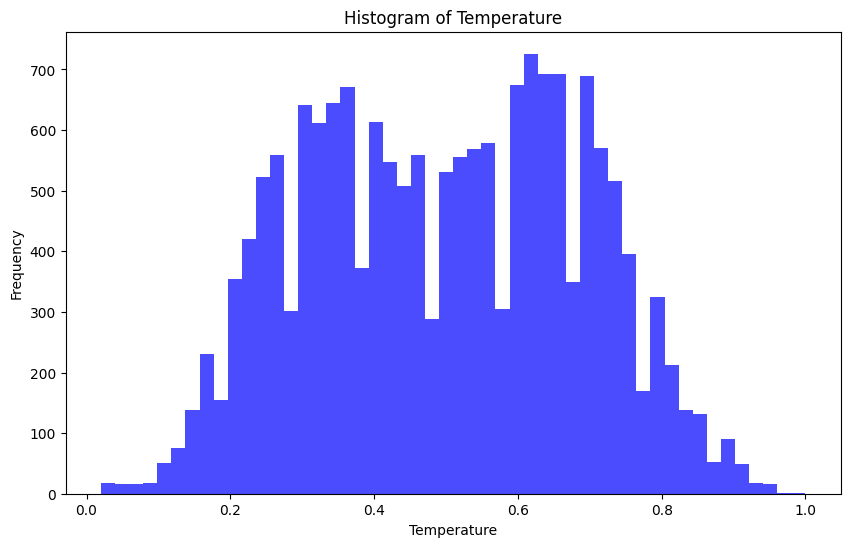

In [63]:
# Plot a histogram for the 'temp' attribute
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['temp'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

In [64]:
df["temp"].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [65]:
df.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,12.015851
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,6.714537
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,6.324555
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,11.916375
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,16.763055
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,31.256999


In [55]:
# apply a feature transformation to your data matrix x such that each column has mean 0 and standard deviation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=attributeNames)

In [56]:
mean = df.mean()
std_dev = df.std()

print("Mean:\n", mean)
print("\nStandard Deviation:\n", std_dev)

Mean:
 season       -1.439157e-16
mnth          0.000000e+00
hr           -7.456426e-17
holiday      -4.170284e-17
weekday       1.367608e-16
workingday    5.233297e-17
weathersit   -2.453108e-17
temp          1.569989e-16
atemp        -1.831654e-16
hum          -3.074562e-16
windspeed     1.537281e-16
cnt           2.060611e-16
dtype: float64

Standard Deviation:
 season        1.000029
mnth          1.000029
hr            1.000029
holiday       1.000029
weekday       1.000029
workingday    1.000029
weathersit    1.000029
temp          1.000029
atemp         1.000029
hum           1.000029
windspeed     1.000029
cnt           1.000029
dtype: float64
